# Предсказание факта задержки авиарейса

## 1. Описание задачи

Необходимо предсказать факт задержки авиарейса, основываясь на входных данных из датасета (https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations?select=new_data_small.csv)

## 2. Описание данных

Датасет состоит из 26 столбцов.

1. MONTH - номер месяца, когда происходил рейс. (В нашем варианте датасета MONTH == 1 для всех записей)
1. DAY_OF_WEEK - номер дня недели, когда происходил рейс.
1. DEP_DEL15 - факт задержки авиарейса (А именно, =1, когда задержка превысила 15 минут)
1. DISTANCE_GROUP - turbulence group, от этого значения зависят минимальные расстояния между самолетами.
1. DEP_BLOCK - время вылета рейса (утро/день/вечер и т.д.)
1. SEGMENT_NUMBER - число сегментов рейса.
1. CONCURRENT_FLIGHTS - число вылетов из того же аэропорта в то же время вылета (dep_block). 
1. NUMBER_OF_SEATS - число сидений в самолете.
1. CARRIER_NAME - авиакомпания.
1. AIRPORT_FLIGHTS_MONTH - среднее число взлетов с этого аэропорта в месяц.
1. AIRLINE_FLIGHTS_MONTH - среднее число рейсов авивкомпании в месяц.
1. AIRLINE_AIRPORT_FLIGHTS_MONTH - среднее число рейсов этой авиакомпании, начинавшихся с этого аэропорта, в месяц
1. AVG_MONTHLY_PASS_AIRPORT - среднее число пассажиров аэропорта в месяц.
1. AVG_MONTHLY_PASS_AIRLINE - среднее число пассажиров авиакомпании в месяц.
1. FLT_ATTENDANTS_PER_PASS - число стюардесс авиакомпании, деленное на число пассажиров авиакомпании.
1. GROUND_SERV_PER_PASS - число сотрудников наземной службы авиакомпании, деленное на число пассажиров авиакомпании.
1. PLANE_AGE - возраст самолета.
1. DEPARTING_AIRPORT - название аэропорта, где начинается авиарейс.
1. LATITUDE - широта аэропорта вылета.
1. LONGITUDE - долгота аэропорта вылета.
1. PREVIOUS_AIRPORT - прошлый аэропорт, из которого прилетел самолет.
1. PRCP - дюймы выпавших осадков за день.
1. SNOW - дюймы выпавшего снега за день.
1. SNWD - дюймы снега на земле.
1. TMAX - максимальная температура за день.
1. AWND - максимальная скорость ветра за день.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
# Датасет оказался слишком большим, возьмем пробу размером в 10% от датасета, чтобы все работало
import random

filename = "new_data_small.csv" 
n = sum(1 for line in open(filename))-1  
s = n//10  
skip = sorted(random.sample(range(1, n+1), n-s))   
data = pd.read_csv(filename, skiprows=skip)

In [3]:
# Посмотрим на размеры нашего датасета
data.shape

(49893, 26)

In [4]:
# Посмотрим на примеры данных
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,1,0,3,EARLY_MORNING,1,8,128,American Airlines Inc.,5021,...,19,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
1,1,1,0,3,MORNING,1,49,143,Southwest Airlines Co.,5021,...,12,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
2,1,1,0,10,MORNING,1,49,142,United Air Lines Inc.,5021,...,24,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
3,1,1,0,2,MORNING,1,49,99,American Airlines Inc.,5021,...,12,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
4,1,1,0,5,MIDDAY,2,34,160,American Airlines Inc.,5021,...,3,Raleigh-Durham International,35.875,-78.782,Dallas Fort Worth Regional,0.46,0.0,0.0,67.0,5.37


In [5]:
data.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
49888,1,2,0,11,AFTERNOON,2,27,157,Alaska Airlines Inc.,2383,...,8,Kahului Airport,20.901,-156.434,Portland International,0.0,0.0,0.0,82.0,4.47
49889,1,2,0,10,EVENING,3,11,175,Southwest Airlines Co.,2383,...,7,Kahului Airport,20.901,-156.434,San Jose International,0.0,0.0,0.0,82.0,4.47
49890,1,2,0,1,MIDDAY,3,14,175,Southwest Airlines Co.,2383,...,7,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47
49891,1,2,0,11,LATE_NIGHT,6,11,157,Alaska Airlines Inc.,2383,...,11,Kahului Airport,20.901,-156.434,Seattle International,0.0,0.0,0.0,82.0,4.47
49892,1,2,0,1,EVENING,9,11,123,Hawaiian Airlines Inc.,2383,...,19,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47


In [6]:
# Посмотрим на столбцы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49893 entries, 0 to 49892
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          49893 non-null  int64  
 1   DAY_OF_WEEK                    49893 non-null  int64  
 2   DEP_DEL15                      49893 non-null  int64  
 3   DISTANCE_GROUP                 49893 non-null  int64  
 4   DEP_BLOCK                      49893 non-null  object 
 5   SEGMENT_NUMBER                 49893 non-null  int64  
 6   CONCURRENT_FLIGHTS             49893 non-null  int64  
 7   NUMBER_OF_SEATS                49893 non-null  int64  
 8   CARRIER_NAME                   49893 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          49893 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          49893 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  49893 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       49893 non-null 

## 3. Визуализация данных

In [7]:
# Вычислим некоторые основные характеристики
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,49893.0,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,...,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000,49893.000000
mean,1.0,3.941154,0.136973,3.828293,2.980538,89.130860,134.120899,12507.354859,60705.206522,3334.505542,...,0.000510,0.000706,11.258974,36.270661,-95.226624,0.083833,0.044808,0.146840,56.377494,8.168890
std,0.0,1.904452,0.343822,2.350594,1.723990,65.752861,47.383178,8575.251793,32948.623046,4103.718077,...,0.000462,0.000257,7.076053,5.591435,18.133762,0.236351,0.289836,0.798641,14.978893,3.990167
min,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,3.000000,...,0.000000,0.000033,0.000000,18.440000,-159.346000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,0.000000,2.000000,2.000000,35.000000,79.000000,5019.000000,24691.000000,617.000000,...,0.000170,0.000540,5.000000,32.899000,-111.967000,0.000000,0.000000,0.000000,45.000000,5.140000
50%,1.0,4.000000,0.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,...,0.000338,0.000616,12.000000,36.092000,-87.906000,0.000000,0.000000,0.000000,57.000000,7.380000
75%,1.0,5.000000,0.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,...,0.000768,0.000911,17.000000,40.639000,-80.936000,0.020000,0.000000,0.000000,67.000000,10.510000
max,1.0,7.000000,1.000000,11.000000,13.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,...,0.001759,0.001265,32.000000,61.169000,-66.002000,3.020000,7.000000,14.200000,88.000000,25.050000


In [8]:
# Признак MONTH нам не нужен, он всегда равен 1 в наших данных
data = data.drop(['MONTH'], axis=1)

In [9]:
# Признаков много, матрица корреляций получилась большой
corr_mat = data.corr()
corr_mat

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
DAY_OF_WEEK,1.000000,0.050603,0.014367,-0.030372,-0.032793,0.012643,-0.003193,-0.006458,-0.004409,0.000393,...,0.004311,-0.001594,-0.008086,-0.020855,-0.003753,0.076519,0.029418,-0.000706,0.072642,0.092923
DEP_DEL15,0.050603,1.000000,0.008319,0.071382,0.014376,-0.015598,0.020417,-0.027730,0.008627,0.021377,...,-0.015166,-0.018743,0.001468,0.002962,0.010305,0.069778,0.036402,0.005664,0.004838,0.044344
DISTANCE_GROUP,0.014367,0.008319,1.000000,-0.253408,-0.016043,0.454426,-0.014789,-0.009721,-0.028277,0.034505,...,0.178661,0.291010,-0.113557,-0.031490,-0.146780,-0.029742,-0.010251,-0.014737,0.081138,0.008680
SEGMENT_NUMBER,-0.030372,0.071382,-0.253408,1.000000,0.013145,-0.217242,0.057904,0.014968,0.058768,0.043480,...,-0.104246,-0.194590,0.072966,-0.029563,-0.069260,-0.010616,-0.022118,-0.004774,0.002302,-0.047426
CONCURRENT_FLIGHTS,-0.032793,0.014376,-0.016043,0.013145,1.000000,-0.032527,0.904800,-0.019327,0.585511,0.867619,...,0.130441,0.095410,0.029086,0.010552,0.121406,0.067213,-0.040559,-0.070172,-0.056829,0.048097
NUMBER_OF_SEATS,0.012643,-0.015598,0.454426,-0.217242,-0.032527,1.000000,-0.007585,0.283074,0.149860,0.056203,...,0.205514,0.365327,-0.096702,-0.153365,-0.145499,-0.014889,-0.034501,-0.038867,0.153743,-0.035754
AIRPORT_FLIGHTS_MONTH,-0.003193,0.020417,-0.014789,0.057904,0.904800,-0.007585,1.000000,-0.014156,0.659909,0.972246,...,0.140321,0.090949,0.030826,-0.012218,0.105119,0.095038,-0.033346,-0.083868,-0.037031,0.060794
AIRLINE_FLIGHTS_MONTH,-0.006458,-0.027730,-0.009721,0.014968,-0.019327,0.283074,-0.014156,1.000000,0.224715,0.000492,...,0.004692,-0.006342,0.183587,-0.010299,-0.079667,-0.007451,-0.002348,-0.037971,0.024371,-0.089946
AIRLINE_AIRPORT_FLIGHTS_MONTH,-0.004409,0.008627,-0.028277,0.058768,0.585511,0.149860,0.659909,0.224715,1.000000,0.652133,...,0.140395,0.148408,0.110465,-0.058854,0.086277,0.127473,-0.036354,-0.061369,-0.009182,0.029455
AVG_MONTHLY_PASS_AIRPORT,0.000393,0.021377,0.034505,0.043480,0.867619,0.056203,0.972246,0.000492,0.652133,1.000000,...,0.150596,0.103889,0.029066,-0.087957,0.056937,0.090676,-0.051678,-0.102299,0.054627,0.055882


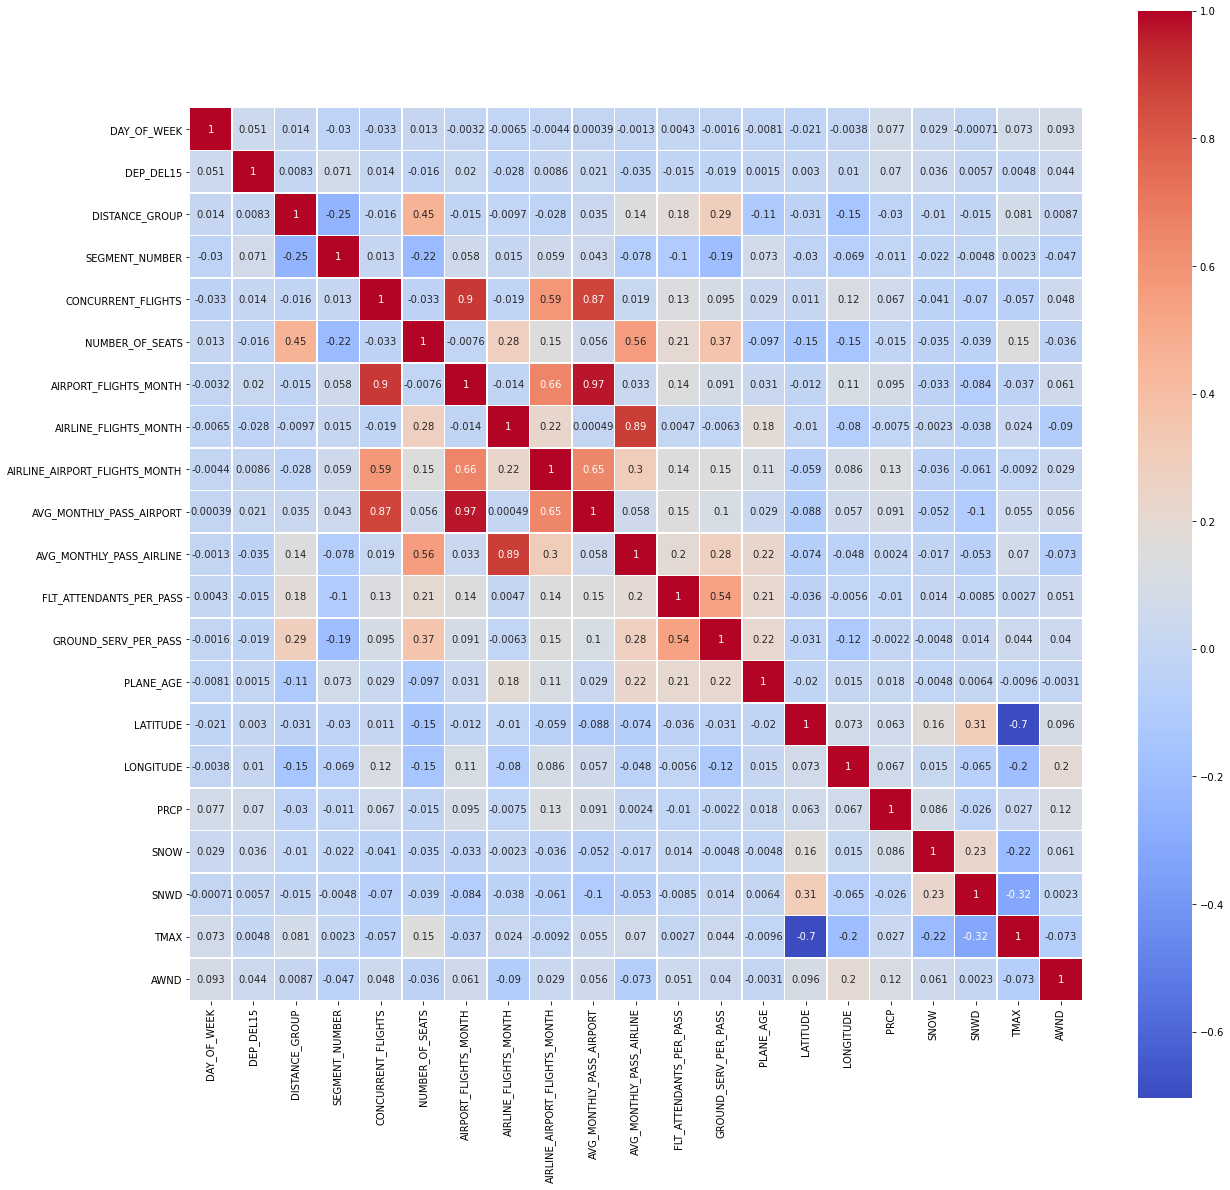

In [88]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, square=True, cmap='coolwarm', annot=True, linewidths=.5)
pass

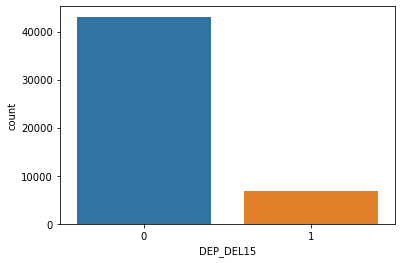

In [11]:
# Признаков много, попробуем визуализировать их поотдельности
# Сначала посмотрим соотношение полетов с задержкой к числу полетов без задержки
sns.countplot(x='DEP_DEL15', data=data)
pass

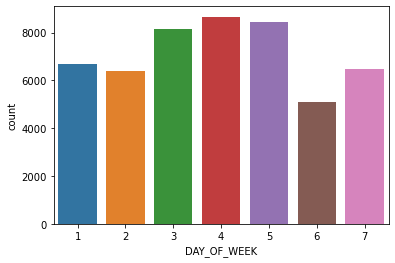

In [12]:
# Сколько полетов происходило в разные дни недели
sns.countplot(x='DAY_OF_WEEK', data=data)
pass

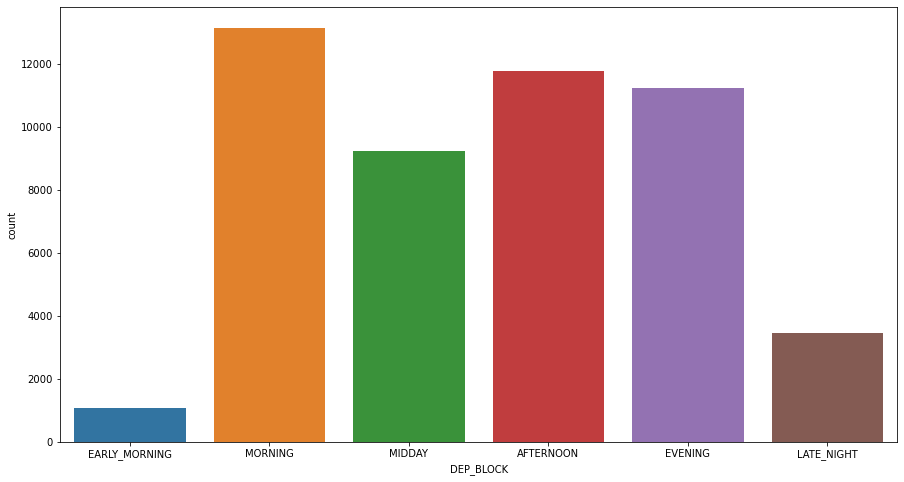

In [13]:
# Число полетов в разное время дня
order_list = ['EARLY_MORNING', 'MORNING', 'MIDDAY', 'AFTERNOON', 'EVENING', 'LATE_NIGHT']
plt.figure(figsize = (15,8))
sns.countplot(x='DEP_BLOCK', data=data, order = order_list)
pass

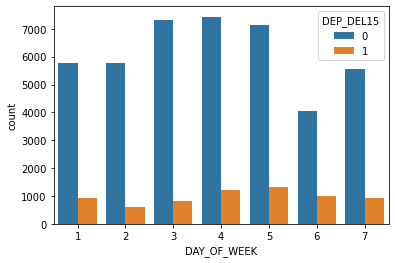

In [14]:
# Из всех признаков вероятность задержки наиболее линейно завима от дня недели и числа сегментов рейса
# Нарисуем графики 
sns.countplot(x='DAY_OF_WEEK',  hue='DEP_DEL15', data=data)
pass

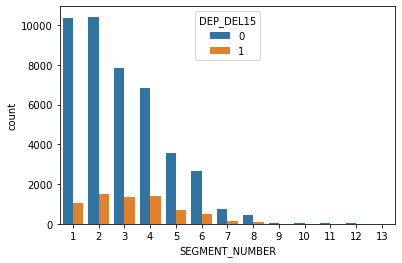

In [15]:
# Значение корреляции измеряется сотыми, графики получились не очень интересными
sns.countplot(x='SEGMENT_NUMBER',  hue='DEP_DEL15', data=data)
pass

Разберемся с выбросами

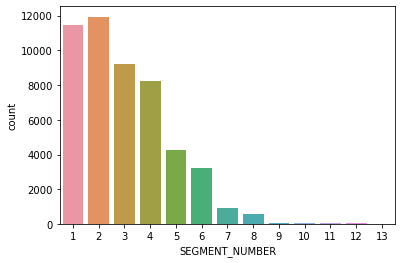

In [16]:
sns.countplot(x='SEGMENT_NUMBER', data=data)
pass
#Здесь все нормально

<Figure size 1080x576 with 0 Axes>

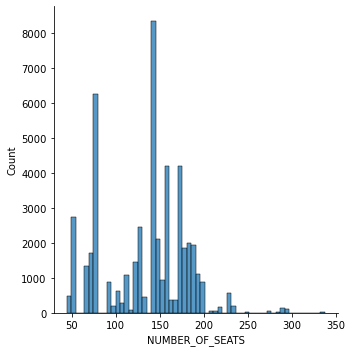

In [17]:
plt.figure(figsize = (15,8))
sns.displot(data.NUMBER_OF_SEATS)
pass
#Здесь все нормально

G:\other\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


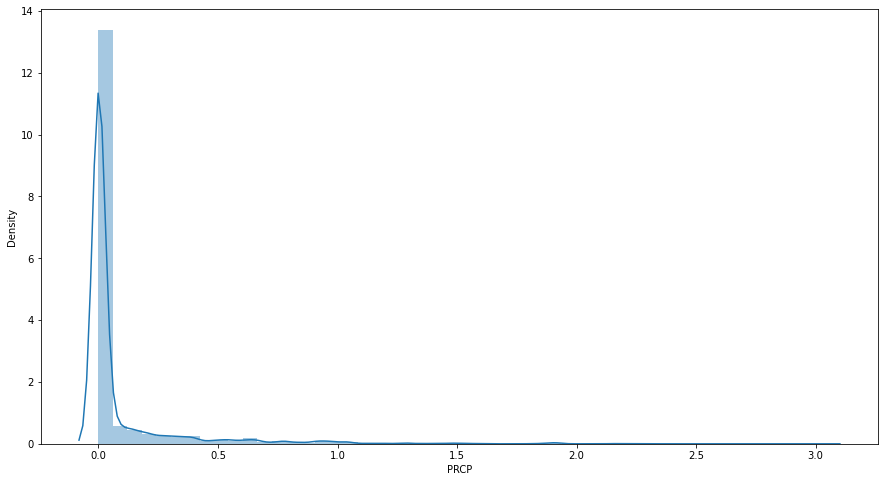

In [18]:
plt.figure(figsize = (15,8))
sns.distplot(data.PRCP)
pass

In [19]:
data['PRCP'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.00
0.010    0.00
0.050    0.00
0.100    0.00
0.500    0.00
0.900    0.28
0.950    0.56
0.990    1.13
0.995    1.49
Name: PRCP, dtype: float64

99.5% значений не превышают величины 1.49, при этом максимальные значения признака могут достигать значения 3.

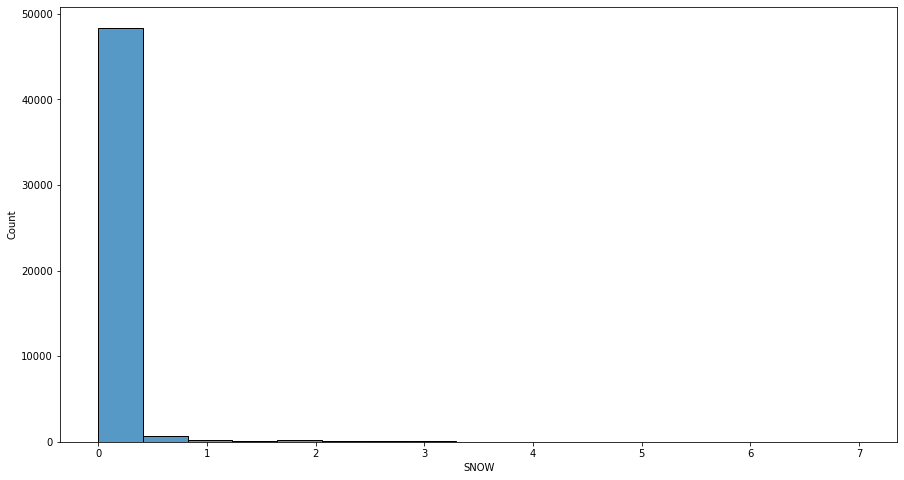

In [20]:
plt.figure(figsize = (15,8))
sns.histplot(data.SNOW)
pass

In [21]:
data['SNOW'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    0.0
0.950    0.0
0.990    1.6
0.995    2.1
Name: SNOW, dtype: float64

99.5% значений SNOW не превышают величины 2.1, при этом максимальные значения признака могут достигать значения 7.

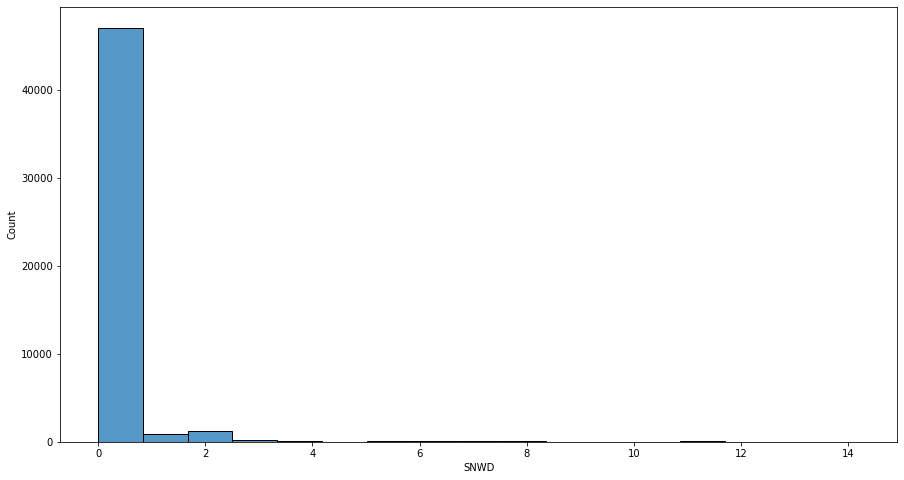

In [22]:
plt.figure(figsize = (15,8))
sns.histplot(data.SNWD)
pass

In [23]:
data['SNWD'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    0.0
0.950    1.2
0.990    3.1
0.995    5.9
Name: SNWD, dtype: float64

99.5% значений SNWD не превышают величины 5.9, при этом максимальные значения признака могут достигать значения 14.

In [24]:
rows_to_drop = data[
    ((data['PRCP'] > data['PRCP'].quantile(0.995)) | 
    (data['SNOW']  > data['SNOW' ].quantile(0.995)) |
     (data['SNWD'] > data['SNWD'].quantile(0.995)))].index
data_new = data.drop(rows_to_drop)
data_new.shape

(49206, 25)

In [25]:
rows_to_drop

Int64Index([  127,   128,   129,   130,  3126,  3127,  4121,  4122,  4123,
             7316,
            ...
            49761, 49762, 49763, 49764, 49765, 49766, 49767, 49790, 49791,
            49792],
           dtype='int64', length=687)

## 4. Обработка категориальных признаков
Пропущенных значений в датасете нет, перейдем сразу к обработке категориальных признаков

In [26]:
data_new["DEP_BLOCK"].nunique()

6

У признака DEP_BLOCK всего 6 уникальных значений и это строковый тип, обрабатывать его будем как категориальный признак

In [27]:
data_new["CARRIER_NAME"].nunique()

17

In [28]:
data_new["DEPARTING_AIRPORT"].nunique()

87

In [29]:
data_new["PREVIOUS_AIRPORT"].nunique()

320

У признаков CARRIER_NAME и DEPARTING_AIRPORT уникальных значений много, но их мы все равно бинаризируем. Признак PREVIOUS_AIRPORT, наверное, лучше дропнуть, там сотни уникальных значений.

In [30]:
DepBlock_dummies = pd.get_dummies(data_new['DEP_BLOCK'])

DepBlock_dummies.head()

,AFTERNOON,EARLY_MORNING,EVENING,LATE_NIGHT,MIDDAY,MORNING
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [31]:
Carrier_dummies = pd.get_dummies(data_new['CARRIER_NAME'])

Carrier_dummies.head()

,Alaska Airlines Inc.,Allegiant Air,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Comair Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Mesa Airlines Inc.,"Midwest Airline, Inc.",SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
DepPort_dummies = pd.get_dummies(data_new['DEPARTING_AIRPORT'])

DepPort_dummies.head()

,Albuquerque International Sunport,Atlanta Municipal,Austin - Bergstrom International,Birmingham Airport,Boise Air Terminal,Bradley International,Charleston International,Chicago Midway International,Chicago O'Hare International,Cincinnati/Northern Kentucky International,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_new = pd.concat((data_new, DepBlock_dummies), axis=1)
data_new = data_new.drop(['DEP_BLOCK'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,SNOW,SNWD,TMAX,AWND,AFTERNOON,EARLY_MORNING,EVENING,LATE_NIGHT,MIDDAY,MORNING
0,1,0,3,1,8,128,American Airlines Inc.,5021,75591,868,...,0.0,0.0,67.0,5.37,0,1,0,0,0,0
1,1,0,3,1,49,143,Southwest Airlines Co.,5021,107849,746,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
2,1,0,10,1,49,142,United Air Lines Inc.,5021,48104,346,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
3,1,0,2,1,49,99,American Airlines Inc.,5021,75591,868,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
4,1,0,5,2,34,160,American Airlines Inc.,5021,75591,868,...,0.0,0.0,67.0,5.37,0,0,0,0,1,0


In [34]:
data_new = pd.concat((data_new, Carrier_dummies), axis=1)
data_new = data_new.drop(['CARRIER_NAME'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Endeavor Air Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Mesa Airlines Inc.,"Midwest Airline, Inc.",SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,1,0,3,1,8,128,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,1,0,0
2,1,0,10,1,49,142,5021,48104,346,99113,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2,1,49,99,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
4,1,0,5,2,34,160,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data_new = pd.concat((data_new, DepPort_dummies), axis=1)
data_new = data_new.drop(['DEPARTING_AIRPORT'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
0,1,0,3,1,8,128,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,0,0,0
2,1,0,10,1,49,142,5021,48104,346,99113,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,1,49,99,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
4,1,0,5,2,34,160,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49206 entries, 0 to 49892
Columns: 132 entries, DAY_OF_WEEK to William P Hobby
dtypes: float64(9), int64(12), object(1), uint8(110)
memory usage: 13.8+ MB


Категориальные признаки мы успешно обработали

## 5. Нормализация данных

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Выполним стандартизацию численных признаков.

In [37]:
data_numerical = data_new.select_dtypes(include=np.number)
data_numerical.describe()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,...,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000
mean,3.936634,0.136061,3.830448,2.981791,89.404951,134.185668,12543.931330,60813.339369,3334.634435,307637.919867,...,0.004004,0.038349,0.014490,0.003231,0.001504,0.003211,0.002723,0.010243,0.003231,0.010487
std,1.902226,0.342856,2.351987,1.723727,65.362585,47.411763,8515.636125,32950.193823,4077.064071,212663.242391,...,0.063148,0.192039,0.119501,0.056753,0.038751,0.056575,0.052114,0.100687,0.056753,0.101866
min,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,3.000000,13584.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000,35.000000,79.000000,5019.000000,24691.000000,629.000000,127411.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,320589.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,416815.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,11.000000,13.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
data_numerical = data_numerical.drop(['DEP_DEL15'], axis=1)
data_numerical.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,4.920600e+04,...,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000,49206.000000
mean,3.936634,3.830448,2.981791,89.404951,134.185668,12543.931330,60813.339369,3334.634435,307637.919867,1.454915e+06,...,0.004004,0.038349,0.014490,0.003231,0.001504,0.003211,0.002723,0.010243,0.003231,0.010487
std,1.902226,2.351987,1.723727,65.362585,47.411763,8515.636125,32950.193823,4077.064071,212663.242391,9.348020e+05,...,0.063148,0.192039,0.119501,0.056753,0.038751,0.056575,0.052114,0.100687,0.056753,0.101866
min,1.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,3.000000,13584.000000,1.050860e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,35.000000,79.000000,5019.000000,24691.000000,629.000000,127411.000000,5.350680e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,320589.000000,1.539321e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,416815.000000,2.338195e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,11.000000,13.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,2.447530e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [40]:
data_numerical.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,...,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04
mean,-6.826155e-15,1.723470e-15,3.000062e-15,1.038306e-14,1.031835e-15,-1.046984e-15,-1.724801e-15,-7.148841e-15,-4.496780e-14,-3.533914e-15,...,4.712802e-14,5.220909e-14,2.456039e-14,-1.716144e-14,-1.826899e-14,1.721342e-14,-1.101204e-14,2.802696e-14,1.947946e-14,-7.876097e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.543788e+00,-1.203428e+00,-1.149712e+00,-1.352531e+00,-1.902179e+00,-1.343520e+00,-1.632626e+00,-8.171651e-01,-1.382721e+00,-1.443973e+00,...,-6.340022e-02,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01
25%,-1.018088e+00,-7.782557e-01,-5.695743e-01,-8.323562e-01,-1.163966e+00,-8.836605e-01,-1.096271e+00,-6.636232e-01,-8.474757e-01,-9.840015e-01,...,-6.340022e-02,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01
50%,3.331164e-02,-3.530833e-01,1.056383e-02,-1.897867e-01,1.859102e-01,-1.250560e-01,2.696694e-01,-3.067488e-01,6.089948e-02,9.029335e-02,...,-6.340022e-02,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01
75%,5.590117e-01,4.972614e-01,5.907019e-01,5.292791e-01,8.186646e-01,6.031339e-01,5.830819e-01,3.302292e-01,5.133801e-01,9.448850e-01,...,-6.340022e-02,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01
max,1.610412e+00,3.048295e+00,5.811945e+00,3.007761e+00,4.277722e+00,2.296724e+00,1.427478e+00,3.955387e+00,2.391274e+00,1.061846e+00,...,1.577249e+01,5.007574e+00,8.246893e+00,1.756318e+01,2.576689e+01,1.761886e+01,1.913639e+01,9.830005e+00,1.756318e+01,9.713833e+00


In [48]:
final_data = pd.concat((data_numerical, data_new['PREVIOUS_AIRPORT'], data_new['DEP_DEL15']), axis = 1)

In [49]:
final_data.shape

(49206, 132)

In [50]:
final_data.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby,DEP_DEL15
count,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,...,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,4.920600e+04,49206.000000
mean,-6.826155e-15,1.723470e-15,3.000062e-15,1.038306e-14,1.031835e-15,-1.046984e-15,-1.724801e-15,-7.148841e-15,-4.496780e-14,-3.533914e-15,...,5.220909e-14,2.456039e-14,-1.716144e-14,-1.826899e-14,1.721342e-14,-1.101204e-14,2.802696e-14,1.947946e-14,-7.876097e-14,0.136061
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.342856
min,-1.543788e+00,-1.203428e+00,-1.149712e+00,-1.352531e+00,-1.902179e+00,-1.343520e+00,-1.632626e+00,-8.171651e-01,-1.382721e+00,-1.443973e+00,...,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01,0.000000
25%,-1.018088e+00,-7.782557e-01,-5.695743e-01,-8.323562e-01,-1.163966e+00,-8.836605e-01,-1.096271e+00,-6.636232e-01,-8.474757e-01,-9.840015e-01,...,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01,0.000000
50%,3.331164e-02,-3.530833e-01,1.056383e-02,-1.897867e-01,1.859102e-01,-1.250560e-01,2.696694e-01,-3.067488e-01,6.089948e-02,9.029335e-02,...,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01,0.000000
75%,5.590117e-01,4.972614e-01,5.907019e-01,5.292791e-01,8.186646e-01,6.031339e-01,5.830819e-01,3.302292e-01,5.133801e-01,9.448850e-01,...,-1.996934e-01,-1.212553e-01,-5.693613e-02,-3.880871e-02,-5.675622e-02,-5.225539e-02,-1.017273e-01,-5.693613e-02,-1.029439e-01,0.000000
max,1.610412e+00,3.048295e+00,5.811945e+00,3.007761e+00,4.277722e+00,2.296724e+00,1.427478e+00,3.955387e+00,2.391274e+00,1.061846e+00,...,5.007574e+00,8.246893e+00,1.756318e+01,2.576689e+01,1.761886e+01,1.913639e+01,9.830005e+00,1.756318e+01,9.713833e+00,1.000000


In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49206 entries, 0 to 49892
Columns: 132 entries, DAY_OF_WEEK to DEP_DEL15
dtypes: float64(130), int64(1), object(1)
memory usage: 49.9+ MB


## 6. Отбор признаков и классификация

Для предсказания задержек будем использовать все входные признаки, кроме PREVIOUS_AIRPORT, этот признак не сильно важен, и это категориальный признак с сотнями уникальных значений.

In [52]:
final_data.columns

Index(['DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS',
       'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE',
       ...
       'Tampa International', 'Theodore Francis Green State', 'Truax Field',
       'Tucson International', 'Tulsa International',
       'Washington Dulles International', 'Will Rogers World',
       'William P Hobby', 'PREVIOUS_AIRPORT', 'DEP_DEL15'],
      dtype='object', length=132)

In [53]:
X = final_data.drop(['DEP_DEL15', 'PREVIOUS_AIRPORT'], axis=1)
y = final_data['DEP_DEL15']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(36904, 12302)

Создадим модель метода ближайших соседей с числом соседей = 10, потренируем ее.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Выведем ошибку на тренировочной выборке

In [56]:
y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
err_test_1

0.1334814654238023

In [57]:
final_data.shape

(49206, 132)

Выведем ошибку на тестовой выборке

In [58]:
y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
err_test_2

0.13729474882132986

Повторим эти шаги с разным числом соседей

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

nnb = [1, 5, 10, 20, 30, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5, verbose=3)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................................n_neighbors=1; total time=   2.2s
[CV 2/5] END ..................................n_neighbors=1; total time=   2.1s
[CV 3/5] END ..................................n_neighbors=1; total time=   2.1s
[CV 4/5] END ..................................n_neighbors=1; total time=   2.1s
[CV 5/5] END ..................................n_neighbors=1; total time=   2.1s
[CV 1/5] END ..................................n_neighbors=5; total time=   2.7s
[CV 2/5] END ..................................n_neighbors=5; total time=   2.8s
[CV 3/5] END ..................................n_neighbors=5; total time=   3.2s
[CV 4/5] END ..................................n_neighbors=5; total time=   3.4s
[CV 5/5] END ..................................n_neighbors=5; total time=   3.6s
[CV 1/5] END .................................n_neighbors=10; total time=   2.8s
[CV 2/5] END .................................n_n

Оптимальным числом соседей является число 30.
Ошибка получилась ~13.6%

Попробуем позапускать другие модели классификации

**Random Forest**

In [89]:
rf = ensemble.RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

err_train  = np.mean(y_train  != rf.predict(X_train))
print(f'train error: {err_train}')
err_test  = np.mean(y_test  != rf.predict(X_test))
print(f'test error: {err_test}')

train error: 0.0023032733579015823
test error: 0.14160299138351487


**AdaBoost**

In [72]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
print(f'train error: {err_train}')
err_test = np.mean(y_test != ada.predict(X_test))
print(f'test error: {err_test}')

train error: 0.13502601344027748
test error: 0.13558770931555844


**Gradient Boosting**

In [73]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
print(f'train error: {err_train}')
err_test = np.mean(y_test != gbt.predict(X_test))
print(f'test error: {err_test}')

train error: 0.13456535876869716
test error: 0.1357502845065843


Точности получили примерно такие же.

## 7. Выводы

В рамках проделанной работы была выполнена задача классификации авиарейсов по факту задержки на основании данных из датасета. Данные из датасета были прочитаны, исследованы, визуализированы. Была выполнена предобработка входных данных: были исключены выбросы, были бинаризированы категориальные признаки, были нормализованы численные признаки.  Обработанные данные были разделены на тренировочные и тестовые, на этих данных запускался классификатор ближайших соседей с разными параметрами. Было обнаружено, что для нашего датасета оптимальным числом ближайших соседей является 30. Сам классификатор работал с достаточно хорошей точностью в ~86.4%. 